<a href="https://colab.research.google.com/github/Samhitha-Jasti/DAProjects/blob/main/IrisFlowerClassification_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [16]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

### Histograms


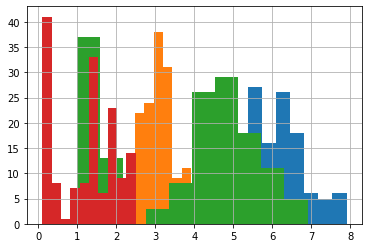

In [17]:
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

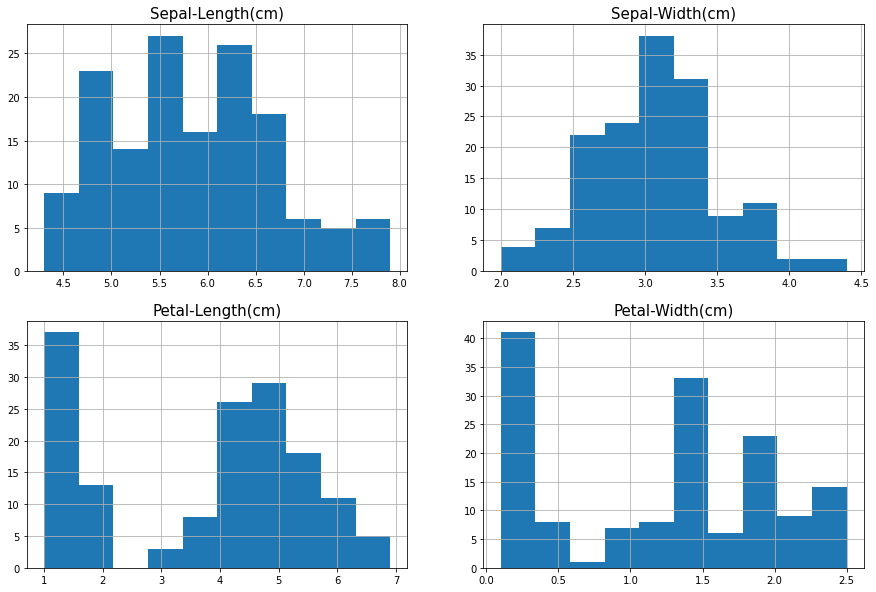

In [18]:
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('Sepal-Length(cm)',fontsize=15)
plt.hist(df['SepalLengthCm'])
plt.grid()

plt.subplot(2,2,2)
plt.title('Sepal-Width(cm)', fontsize=15)
plt.hist(df['SepalWidthCm'])
plt.grid()

plt.subplot(2,2,3)
plt.title('Petal-Length(cm)', fontsize=15)
plt.hist(df['PetalLengthCm'])
plt.grid()

plt.subplot(2,2,4)
plt.title('Petal-Width(cm)', fontsize=15)
plt.hist(df['PetalWidthCm'])
plt.grid()

### Scatter Plots

In [19]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

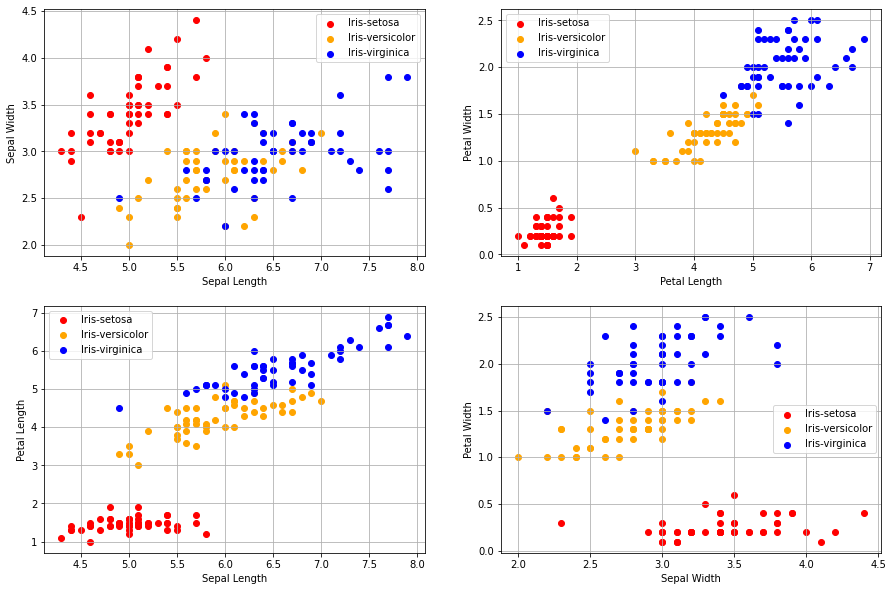

In [21]:
plt.subplots(figsize=(15, 10))
plt.subplot(2,2,1)
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid()

plt.subplot(2,2,2)
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()

plt.subplot(2,2,3)
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.grid()

plt.subplot(2,2,4)
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()



### Coorelation Matrix

In [22]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


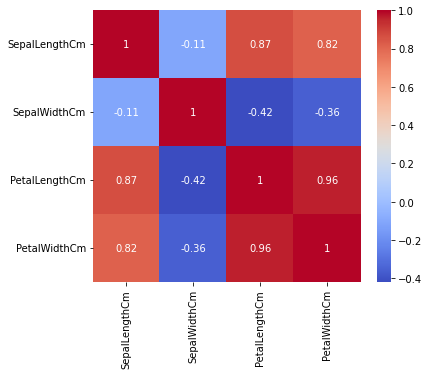

In [23]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

### Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df['Species']=le.fit_transform(df['Species'])

In [26]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Model Training

In [27]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

### Logistic Regression 

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#model training
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  91.11111111111111


### K neighbors Classifier

In [ ]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


### Decision Tree

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [30]:
#prediction
from sklearn import metrics
y_pred = classifier.predict(X_test)#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred)*100)

Accuracy Score: 93.33333333333333


In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[11,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 18]])

### Gaussian Neighbor

In [38]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3)*100)

Accuracy Score: 93.33333333333333
